In [2]:
import pandas as pd
import numpy as np
import sklearn
import acquire
from acquire import get_zillow_data

In [3]:
df = get_zillow_data()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
df.shape

(77579, 68)

Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
Only include properties that include a latitude and longitude value.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77579 entries, 0 to 77578
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77579 non-null  int64  
 1   parcelid                      77579 non-null  int64  
 2   airconditioningtypeid         25007 non-null  float64
 3   architecturalstyletypeid      207 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77579 non-null  float64
 6   bedroomcnt                    77579 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49809 non-null  float64
 9   calculatedbathnbr             76963 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6037 non-null   float64
 12  calculatedfinishedsquarefeet  77378 non-null  float64
 13  f

In [8]:
new_df = df[['parcelid', 'transactiondate']]

In [10]:
new_df.shape


(77579, 2)

In [11]:
new_df.parcelid.nunique()

77381

In [13]:
max(new_df.transactiondate)

'2017-09-25'

In [17]:
new_df = new_df[new_df.groupby('parcelid')['transactiondate'].transform('max') == new_df['transactiondate']]


In [18]:
new_df.shape

(77381, 2)

In [19]:
df = df[df.groupby('parcelid')['transactiondate'].transform('max') == df['transactiondate']]


# Summary Stats

In [20]:
df.shape

(77381, 68)

In [21]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738100e+04,7.738100e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,76772.000000,...,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000
mean,1.495139e+06,1.300715e+07,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,2.316867,...,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,0.016625
std,8.609071e+05,3.481346e+06,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,0.979755,...,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,0.170191
min,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,7.520700e+05,1.153830e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,...,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,-0.024377
50%,1.497932e+06,1.253157e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,...,1.000000,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,0.006627
75%,2.240535e+06,1.421183e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,3.000000,...,2.000000,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,0.039203
max,2.982274e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,18.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [23]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
buildingclassdesc            object
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 68, dtype: object

In [25]:
df.numberofstories.value_counts()

1.0    10366
2.0     6757
3.0      436
6.0        1
Name: numberofstories, dtype: int64

In [26]:
df.bedroomcnt.value_counts()

3.0     30362
2.0     19169
4.0     17513
5.0      4543
1.0      3379
6.0       998
0.0       830
8.0       252
7.0       208
9.0        70
10.0       31
12.0       14
11.0        8
13.0        2
16.0        1
14.0        1
Name: bedroomcnt, dtype: int64

In [27]:
df.bathroomcnt.value_counts()

2.0     31485
3.0     17313
1.0     12902
2.5      6604
4.0      3352
1.5      1415
3.5      1034
5.0      1026
4.5       695
0.0       592
6.0       417
5.5       224
7.0       113
8.0       108
6.5        47
9.0        23
7.5        16
10.0        7
8.5         3
11.0        3
13.0        1
18.0        1
Name: bathroomcnt, dtype: int64

In [28]:
df.taxvaluedollarcnt.mean()

490134.4798785216

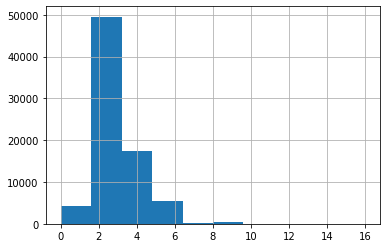

In [30]:
df.bedroomcnt.hist()

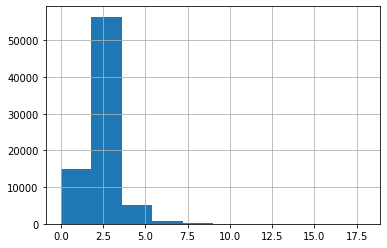

In [31]:
df.bathroomcnt.hist()

- Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [37]:
def null_values_and_percentages(df):
    #make a variable that holds the count of nulls for each column
    num_missing = df.isnull().sum()
    #rows equals rows in df using shape[0]
    rows = df.shape[0]
    #pct_missing calculates percentage of nulls for each column
    pct_missing = num_missing / rows
    #labels each new column and provides the value for each row using variables above
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [33]:
null_values_and_percentages(df)

,number_missing_rows,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
...,...,...
buildingclassdesc,77366,0.999806
heatingorsystemdesc,27941,0.361083
propertylandusedesc,0,0.000000
storydesc,77331,0.999354


In [35]:
df.shape[0]

77381

In [36]:
df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       52428
architecturalstyletypeid    77175
basementsqft                77331
                            ...  
buildingclassdesc           77366
heatingorsystemdesc         27941
propertylandusedesc             0
storydesc                   77331
typeconstructiondesc        77159
Length: 68, dtype: int64

- Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [48]:
def nulls_by_row(df):
    #finds number of null values for each row.
    num_cols_missing = df.isnull().sum(axis=1)
    #finds num of null values for each row,then divides num columns(68),then x 100 to get a percent
    pct_cols_missing = round(df.isnull().sum(axis=1)/df.shape[1]*100,2)
    #creates dataframe, defining columns, then passes in variables above
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing 

In [49]:
nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,23,33.82,2
1,24,35.29,13
2,25,36.76,24
3,26,38.24,65
4,27,39.71,316
5,28,41.18,455
6,29,42.65,5270
7,30,44.12,3455
8,31,45.59,9891
9,32,47.06,12579
